In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import csv
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Summary

The notebook is similar to <b>Profile of Loyal Donors.ipynb</b>. Except here, only donors who are organizations are studied.

In [3]:
question1 = pd.read_csv('sqldata/question1.csv',dtype = str)
question1 = question1[question1['TYPE']=='2']  #Only business partners who are organizations
question1 = question1[['PARTNER','ZZAMNT_PAYED','ORDER_GUID']]
print(question1.shape)
df = pd.DataFrame.from_dict(Counter((question1['ORDER_GUID'])), orient='index').reset_index()
df = df.rename(columns={'index':'ORDER_GUID', 0:'ORDER_GUID_COUNT'})
question1 = pd.merge(question1,df,on='ORDER_GUID',how='inner')
question1['ZZAMNT_PAYED'] = question1['ZZAMNT_PAYED'].astype('float64')
question1['ORDER_GUID_COUNT'] = question1['ORDER_GUID_COUNT'].astype('int32')
print(question1['ZZAMNT_PAYED'].sum())
question1['ZZAMNT_PAYED_NORM'] = question1['ZZAMNT_PAYED']/question1['ORDER_GUID_COUNT']
print(question1['ZZAMNT_PAYED_NORM'].sum())
question1.head()

(15270, 3)
106310115.35999998
106310115.35999998


,PARTNER,ZZAMNT_PAYED,ORDER_GUID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,1000.00,2294EB49A90B1ED5B8CC04B381270A59,1,1000.00
1,0200000002,1303.94,2294EB49A90B1ED5B8D00EC6A72B0A59,1,1303.94
2,0200000002,3000.00,2294EB49A90B1ED5B8CCE0FDE3458A59,1,3000.00
3,0200000002,2500.00,2294EB49A90B1ED5B8D00EB5A9094A59,1,2500.00
4,0200000002,2500.00,2294EB49A90B1ED5B8D00EB9C59C0A59,1,2500.00


In [5]:
question1 = question1[question1['ZZAMNT_PAYED'] >= 0]
question1.reset_index(drop=True,inplace=True)
print(question1['ZZAMNT_PAYED'].sum())
print(question1['ZZAMNT_PAYED_NORM'].sum())
print('Number of donors: '+str(len(set(question1['PARTNER']))))
print(question1.shape)
question1.head()

106310115.35999998
106310115.35999998
Number of donors: 6792
(15270, 5)


,PARTNER,ZZAMNT_PAYED,ORDER_GUID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,1000.00,2294EB49A90B1ED5B8CC04B381270A59,1,1000.00
1,0200000002,1303.94,2294EB49A90B1ED5B8D00EC6A72B0A59,1,1303.94
2,0200000002,3000.00,2294EB49A90B1ED5B8CCE0FDE3458A59,1,3000.00
3,0200000002,2500.00,2294EB49A90B1ED5B8D00EB5A9094A59,1,2500.00
4,0200000002,2500.00,2294EB49A90B1ED5B8D00EB9C59C0A59,1,2500.00


LUF received 15,270 number of valid donations from 6,792 donors since 2002. The total donation was 106,310,115.35 EURO.

In the next couple of cells we calculate the statistics for each donors like: <br>
-  DONATION_COUNT: Number of times a donor has donated to LUF.
-  DONATION_MEAN: Mean donation sum of a donor.
-  DONATION_SUM: Total donation sum of a donor.
-  DONATION_CV: Coefficient of variation of donation sum. <br> 
etc

In [6]:
aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in question1[['PARTNER','ZZAMNT_PAYED_NORM']].groupby('PARTNER'))
aggregate['PARTNER'] = aggregate.index
aggregate = aggregate.reset_index(drop=True)
aggregate = aggregate.rename(columns={'count':'DONATION_COUNT',
                                      'mean':'DONATION_MEAN',
                                      'std':'DONATION_STD',
                                      'min':'DONATION_MIN',
                                      '25%':'DONATION_25',
                                      '50%':'DONATION_50',
                                      '75%':'DONATION_75',
                                      'max':'DONATION_MAX'})
                                      
front = aggregate['PARTNER']
aggregate.drop(labels=['PARTNER'], axis=1,inplace = True)
aggregate.insert(0, 'PARTNER', front)
aggregate.head()
aggregate.to_csv('aggregate.csv')

In [7]:
donor_amount_stats = aggregate
donor_amount_stats['DONATION_SUM'] = donor_amount_stats['DONATION_COUNT'] * donor_amount_stats['DONATION_MEAN']
donor_amount_stats['DONATION_CV'] = donor_amount_stats['DONATION_STD']/donor_amount_stats['DONATION_MEAN']
donor_amount_stats['DONATION_COUNT'] = donor_amount_stats['DONATION_COUNT'].astype(int)
print(donor_amount_stats.shape)
donor_amount_stats.head()

(6792, 11)


,PARTNER,DONATION_COUNT,DONATION_MEAN,DONATION_STD,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV
0,0200000002,7,2186.277143,735.028946,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201
1,0200000007,13,14058.253077,20169.415559,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703
2,0200000010,8,575.000000,265.921578,100.0,500.000,500.0,725.0,1000.00,4600.00,0.462472
3,0200000013,19,12567.816842,10158.236431,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274
4,0200000024,1,20000.000000,NaN,20000.0,20000.000,20000.0,20000.0,20000.00,20000.00,NaN


ADRC is a table that contains the address information of the business partners. <br>
BUT000 is a table that contains all the available information of the business partners like date of birth, sex, language, nationality, country, date of death etc. <br>
BUT020 is the links ADRC with BUT000. <br>
<img src="Images/Q1_table.png">

After merging these 3 tables, we'll get few more features that will help in profiling loyal donors such as:<br>
-  <b>ZZGEBOORTEJAAR</b>: Date of birth of the donors. This field has many missing/invalid values.
-  <b>TITLE_ACADEMDIC</b>: Contains the education profile of donors, if known. This field also has many missing values.
-  <b>TITLE</b>: Contains the title of donors.
-  <b>POST_CODE</b>: Contains the postal id location from where donation is carried out.
-  <b>COUNTRY</b>: Contains the country from where donation is carried out.

In [8]:
adrc = pd.read_csv('sqldata/20190102_ADRC.csv',dtype = str,sep=';')
adrc = adrc.rename(columns = {'POST_CODE1':'POST_CODE'})
adrc['POST_CODE'] = adrc['POST_CODE'].str.strip()#remove 'move down a line'(\r)
print(adrc.shape)
adrc.head()

(66150, 4)


,ADDRNUMBER,COUNTRY,DEFLT_COMM,POST_CODE
0,0007220702,BE,LET,8870
1,0007220705,BE,LET,3140
2,0007220708,BE,LET,3140
3,0007220711,BE,LET,8870
4,0007220713,BE,LET,8870


In [9]:
but000 = pd.read_csv('sqldata/20190102_BUT000.csv',dtype = str, encoding='latin-1',sep=';') 
but000_cols = ['PARTNER','ZZGEBOORTEJAAR','TYPE','BIRTHPL','BU_LANGU','NATIO','TITLE_ACA1','TITLE']
but000 = but000[but000_cols]
but000 = but000.rename(columns = {'TITLE_ACA1':'TITLE_ACADEMIC'})
print(but000.shape) #There are 72,114 different business partners in total. Among them there are 56,897 donors
but000.head()

(72114, 8)


,PARTNER,ZZGEBOORTEJAAR,TYPE,BIRTHPL,BU_LANGU,NATIO,TITLE_ACADEMIC,TITLE
0,0200000219,1960,1,Leuven,N,BE,NaN,0001
1,0200000424,1968,1,Bonheiden,N,BE,NaN,0001
2,0200000844,1962,1,Leuven,N,BE,NaN,0001
3,0200001162,1966,1,Lier,N,BE,NaN,0001
4,0200001323,1958,1,Kortrijk,N,BE,NaN,0002


In [10]:
but020 = pd.read_csv('sqldata/20190102_BUT020.csv',dtype = str,sep=';')
print(but020.shape)
but020.head()

(66150, 2)


,ADDRNUMBER,PARTNER
0,0007187199,0200257932
1,0007187202,0201054033
2,0007187205,0201054034
3,0007187207,0200058535
4,0007187210,0201054035


Below, we merge the profile of donors data with the aggregations of donation sum carried out before.

In [11]:
donor_temp = pd.merge((pd.merge(but000,but020,on='PARTNER',how='left')),
                      adrc,on='ADDRNUMBER',how='left')
q1_data = pd.merge(donor_temp,donor_amount_stats,on='PARTNER')
print(q1_data.shape)
q1_data.head()

(6792, 22)


,PARTNER,ZZGEBOORTEJAAR,TYPE,BIRTHPL,BU_LANGU,NATIO,TITLE_ACADEMIC,TITLE,ADDRNUMBER,COUNTRY,...,DONATION_COUNT,DONATION_MEAN,DONATION_STD,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV
0,0201107734,0000,2,NaN,NaN,NaN,NaN,NaN,0007443628,BE,...,2,13250.000000,16617.009358,1500.0,7375.000,13250.0,19125.0,25000.00,26500.00,1.254114
1,0200000002,0000,2,NaN,NaN,NaN,NaN,NaN,0000037875,BE,...,7,2186.277143,735.028946,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201
2,0200000007,0000,2,NaN,NaN,NaN,NaN,NaN,0000037954,BE,...,13,14058.253077,20169.415559,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703
3,0200000010,0000,2,NaN,NaN,NaN,NaN,NaN,0009668321,BE,...,8,575.000000,265.921578,100.0,500.000,500.0,725.0,1000.00,4600.00,0.462472
4,0200000013,0000,2,NaN,NaN,NaN,NaN,NaN,0000037889,BE,...,19,12567.816842,10158.236431,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274


In [12]:
donation_stat_cols = ['DONATION_COUNT','DONATION_MEAN','DONATION_STD','DONATION_MIN','DONATION_25','DONATION_50','DONATION_75',
                      'DONATION_MAX','DONATION_SUM','DONATION_CV']
q1_data[donation_stat_cols] = q1_data[donation_stat_cols].astype('float64')
q1_data['ZZGEBOORTEJAAR'] = q1_data['ZZGEBOORTEJAAR'].astype('int32')
q1_data['IS_LOYAL'] = np.where(q1_data['DONATION_COUNT']>=5, 1, 0)#see if the customer is loyal
q1_data['IS_LOYAL2'] = np.where(q1_data['DONATION_COUNT']>=2, 1, 0)#see if the customer is loyal
q1_data['IS_LOYAL10'] = np.where(q1_data['DONATION_COUNT']>=10, 1, 0)#see if the customer is loyal
print(q1_data.shape)
q1_data.head()

(6792, 25)


,PARTNER,ZZGEBOORTEJAAR,TYPE,BIRTHPL,BU_LANGU,NATIO,TITLE_ACADEMIC,TITLE,ADDRNUMBER,COUNTRY,...,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV,IS_LOYAL,IS_LOYAL2,IS_LOYAL10
0,0201107734,0,2,NaN,NaN,NaN,NaN,NaN,0007443628,BE,...,1500.0,7375.000,13250.0,19125.0,25000.00,26500.00,1.254114,0,1,0
1,0200000002,0,2,NaN,NaN,NaN,NaN,NaN,0000037875,BE,...,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201,1,1,0
2,0200000007,0,2,NaN,NaN,NaN,NaN,NaN,0000037954,BE,...,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703,1,1,1
3,0200000010,0,2,NaN,NaN,NaN,NaN,NaN,0009668321,BE,...,100.0,500.000,500.0,725.0,1000.00,4600.00,0.462472,1,1,0
4,0200000013,0,2,NaN,NaN,NaN,NaN,NaN,0000037889,BE,...,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274,1,1,1


In [13]:
from scipy.stats import shapiro #To check for normality
corr_cols = ['DONATION_COUNT','DONATION_MEAN','DONATION_MIN','DONATION_25','DONATION_50','DONATION_75',
             'DONATION_MAX','DONATION_SUM','DONATION_CV','IS_LOYAL2','IS_LOYAL','IS_LOYAL10']
corr_cal = q1_data[corr_cols]
cols = ['DONATION_COUNT','DONATION_MEAN','DONATION_50','DONATION_SUM','IS_LOYAL2','IS_LOYAL','IS_LOYAL10']
shapiro_test_cols = ['shapiro_stat','p_value']
shapiro_test_df = pd.DataFrame(columns = shapiro_test_cols)
for col in cols:
    shapiro_stat,p_value = shapiro(corr_cal[col])
    df = pd.DataFrame([[shapiro_stat,p_value]],columns = shapiro_test_cols,index=[col])
    shapiro_test_df = shapiro_test_df.append(df)

shapiro_test_df

,shapiro_stat,p_value
DONATION_COUNT,0.132148,0.0
DONATION_MEAN,0.205013,0.0
DONATION_50,0.198732,0.0
DONATION_SUM,0.079777,0.0
IS_LOYAL2,0.547205,0.0
IS_LOYAL,0.292085,0.0
IS_LOYAL10,0.153757,0.0


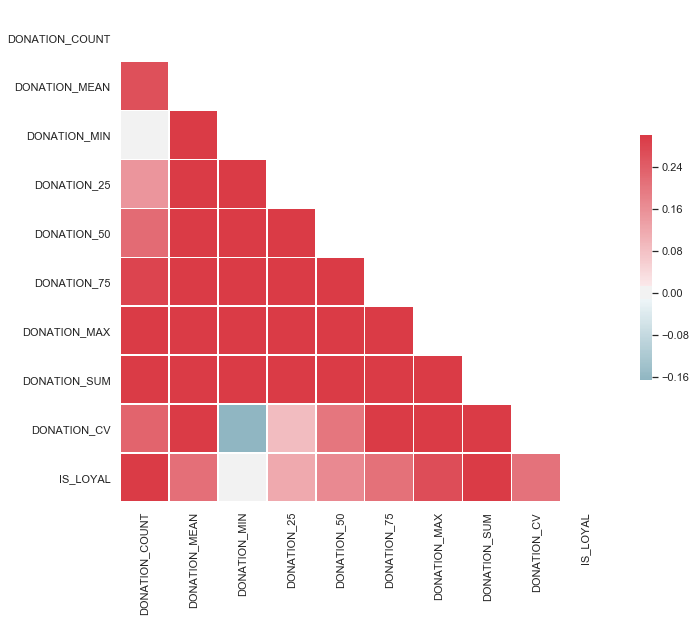

In [14]:
def plot_correlation_heatmap(df):
    corr = df.corr(method='spearman')  #Spearman correlation is used as shapiro test (below) shows data is not normal
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
corr_cols = ['DONATION_COUNT','DONATION_MEAN','DONATION_MIN','DONATION_25','DONATION_50','DONATION_75',
             'DONATION_MAX','DONATION_SUM','DONATION_CV','IS_LOYAL']
corr_cal = q1_data[corr_cols]
plot_correlation_heatmap(corr_cal)#only features (X)

In [15]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
print(spearmanr(corr_cal['DONATION_MEAN'],corr_cal['IS_LOYAL']))
#print(pearsonr(corr_cal['DONATION_MEAN'],corr_cal['IS_LOYAL']))
cols = ['DONATION_MEAN','DONATION_MIN','DONATION_25','DONATION_50','DONATION_75','DONATION_MAX','DONATION_SUM']
spearman_cor_cols = ['IS_LOYAL','P-Value']
spearman_cor_df = pd.DataFrame(columns = spearman_cor_cols)
for col in cols:
    spear_col_stat,p_value = spearmanr(corr_cal[col],corr_cal['IS_LOYAL'])
    df = pd.DataFrame([[spear_col_stat,p_value]],columns=spearman_cor_cols,index=[col])
    spearman_cor_df = spearman_cor_df.append(df)
    
spearman_cor_df['IS_LOYAL'] = spearman_cor_df['IS_LOYAL'].round(4)    
spearman_cor_df

SpearmanrResult(correlation=0.21228865835563399, pvalue=4.6401343926787656e-70)


,IS_LOYAL,P-Value
DONATION_MEAN,0.2123,4.640134e-70
DONATION_MIN,-0.0027,8.252211e-01
DONATION_25,0.1191,6.721868e-23
DONATION_50,0.1701,3.071474e-45
DONATION_75,0.2087,1.021518e-67
DONATION_MAX,0.2680,4.297670e-112
DONATION_SUM,0.3710,1.087694e-220


The above 2 cells is used to answer the question: Does the gift amount play a role for being a loyal donor? <br>
We found the answer to be <b>No</b> as no significant correlation between being a loyal donor & donation statistics such as mean/sum/min etc.

## Loyal Donors
From now onwards we will analyse the profile that is specific to loyal donors. <br>
A loyal donor is someone who has donated to LUF at least 5 times.

In [16]:
loyal_donor = q1_data[q1_data['DONATION_COUNT']>=5]
print(loyal_donor.shape)
loyal_donor.head()

(519, 25)


,PARTNER,ZZGEBOORTEJAAR,TYPE,BIRTHPL,BU_LANGU,NATIO,TITLE_ACADEMIC,TITLE,ADDRNUMBER,COUNTRY,...,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV,IS_LOYAL,IS_LOYAL2,IS_LOYAL10
1,0200000002,0,2,NaN,NaN,NaN,NaN,NaN,0000037875,BE,...,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201,1,1,0
2,0200000007,0,2,NaN,NaN,NaN,NaN,NaN,0000037954,BE,...,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703,1,1,1
3,0200000010,0,2,NaN,NaN,NaN,NaN,NaN,0009668321,BE,...,100.0,500.000,500.0,725.0,1000.00,4600.00,0.462472,1,1,0
4,0200000013,0,2,NaN,NaN,NaN,NaN,NaN,0000037889,BE,...,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274,1,1,1
6,0200000035,0,2,NaN,NaN,NaN,NaN,NaN,0000037918,BE,...,288.5,3500.000,9000.0,22000.0,41000.00,833936.58,0.841340,1,1,1


Check the missing values in the data and fill the missing values with appropriate labels

In [17]:
loyal_donor.isna().sum()

PARTNER             0
ZZGEBOORTEJAAR      0
TYPE                0
BIRTHPL           519
BU_LANGU          519
NATIO             519
TITLE_ACADEMIC    519
TITLE             519
ADDRNUMBER          0
COUNTRY             0
DEFLT_COMM          7
POST_CODE           0
DONATION_COUNT      0
DONATION_MEAN       0
DONATION_STD        0
DONATION_MIN        0
DONATION_25         0
DONATION_50         0
DONATION_75         0
DONATION_MAX        0
DONATION_SUM        0
DONATION_CV         0
IS_LOYAL            0
IS_LOYAL2           0
IS_LOYAL10          0
dtype: int64

In [18]:
loyal_donor['BIRTHPL'] = loyal_donor['BIRTHPL'].fillna('Unknown')
loyal_donor['BU_LANGU'] = loyal_donor['BU_LANGU'].fillna('Unknown')
loyal_donor['NATIO'] = loyal_donor['NATIO'].fillna('Unknown')
loyal_donor['TITLE_ACADEMIC'] = loyal_donor['TITLE_ACADEMIC'].fillna('Unknown')
loyal_donor['TITLE'] = loyal_donor['TITLE'].fillna('Unknown')
print(loyal_donor.shape)
loyal_donor.head()

(519, 25)


,PARTNER,ZZGEBOORTEJAAR,TYPE,BIRTHPL,BU_LANGU,NATIO,TITLE_ACADEMIC,TITLE,ADDRNUMBER,COUNTRY,...,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV,IS_LOYAL,IS_LOYAL2,IS_LOYAL10
1,0200000002,0,2,Unknown,Unknown,Unknown,Unknown,Unknown,0000037875,BE,...,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201,1,1,0
2,0200000007,0,2,Unknown,Unknown,Unknown,Unknown,Unknown,0000037954,BE,...,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703,1,1,1
3,0200000010,0,2,Unknown,Unknown,Unknown,Unknown,Unknown,0009668321,BE,...,100.0,500.000,500.0,725.0,1000.00,4600.00,0.462472,1,1,0
4,0200000013,0,2,Unknown,Unknown,Unknown,Unknown,Unknown,0000037889,BE,...,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274,1,1,1
6,0200000035,0,2,Unknown,Unknown,Unknown,Unknown,Unknown,0000037918,BE,...,288.5,3500.000,9000.0,22000.0,41000.00,833936.58,0.841340,1,1,1


The below cell tries to answer the question: Does a loyal donor always give the same amount?

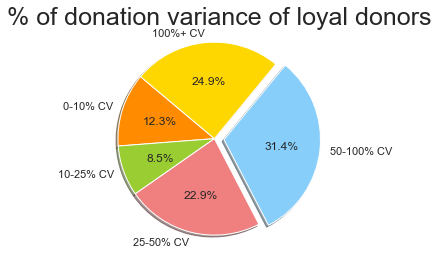

In [23]:
labels = ['0-10% CV','10-25% CV','25-50% CV','50-100% CV','100%+ CV']
donation_cv = loyal_donor['DONATION_CV']
ranges = [0,0.10,0.25,0.50,1,10]
sizes = donation_cv.value_counts(bins=ranges,sort=False)
colors = ['darkorange', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']
explode = np.where(sizes==sizes.max(), 0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of donation variance of loyal donors',fontsize=25)
plt.axis('equal')
plt.show()

Most of the donors usually donate similar amount. As most of them have moderate Coefficient of Variation (CV).

## Location Profile

#### Location Profile - Country

In [24]:
ld = loyal_donor
ld['DONATION_COUNT'] = ld['DONATION_COUNT'].astype('int32')
column_names = ['Region','No_of_Loyal_Donors','Donation_Count','Avg_Donation_Freq','Total_Donation','Avg_Donation']
donation_stats = pd.DataFrame(columns = column_names)
for reg,count in ld['COUNTRY'].value_counts().iteritems():
    donation_stats.loc[len(donation_stats)] = [reg,format(count,",d"),format(ld[ld['COUNTRY'] == reg]['DONATION_COUNT'].sum(),",d"),format(ld[ld['COUNTRY'] == reg]['DONATION_COUNT'].sum()/count,",.2f"),format(round(ld[ld['COUNTRY'] == reg]['DONATION_SUM'].sum(),2),",.2f"),format(round(ld[ld['COUNTRY'] == reg]['DONATION_SUM'].sum()/ld[ld['COUNTRY'] == reg]['DONATION_COUNT'].sum(),2),",.2f")]
    #print(reg,count,ld[ld['COUNTRY'] == reg]['DONATION_COUNT'].sum(),ld[ld['COUNTRY'] == reg]['DONATION_SUM'].sum(),ld[ld['COUNTRY'] == reg]['DONATION_SUM'].sum()/ld[ld['COUNTRY'] == reg]['DONATION_COUNT'].sum())

donation_stats.loc[len(donation_stats)] = ['Outside BE',format(ld[ld['COUNTRY'] != 'BE']['COUNTRY'].size,",d"),format(ld[ld['COUNTRY'] != 'BE']['DONATION_COUNT'].sum(),",d"),format(ld[ld['COUNTRY'] != 'BE']['DONATION_COUNT'].sum()/ld[ld['COUNTRY'] != 'BE']['COUNTRY'].size,",.2f"),format(round(ld[ld['COUNTRY'] != 'BE']['DONATION_SUM'].sum(),2),",.2f"),format(round(ld[ld['COUNTRY'] != 'BE']['DONATION_SUM'].sum()/ld[ld['COUNTRY'] != 'BE']['DONATION_COUNT'].sum(),2),",.2f")]
#put the last row ('Outside BE') to first row
donation_stats = donation_stats.apply(np.roll, shift=1)
#swap the first two rows ('Outside BE' & 'BE')
b, c = donation_stats.iloc[0], donation_stats.iloc[1]
temp = donation_stats.iloc[0].copy()
donation_stats.iloc[0] = c
donation_stats.iloc[1] = temp
donation_stats

,Region,No_of_Loyal_Donors,Donation_Count,Avg_Donation_Freq,Total_Donation,Avg_Donation
0,BE,504,"6,766",13.42,"71,703,939.68","10,597.69"
1,Outside BE,15,313,20.87,"13,974,225.45","44,646.09"
2,NL,10,209,20.90,"10,265,437.62","49,116.93"
3,US,2,33,16.50,"1,545,059.37","46,819.98"
4,CH,2,61,30.50,"2,028,878.46","33,260.30"
5,DE,1,10,10.00,"134,850.00","13,485.00"


Not surprisingly, Belgium (BE) tops the list with the highest number of loyal donors, the highest number of donations received, and the total donation sum received. <br>
An interesting observation from the table is that loyal donors from <b>outside Belgium</b> donate on an average <i>four times</i> more per donation than loyal donors from <b>Belgium</b>.

In [25]:
country = loyal_donor['COUNTRY'].value_counts()
country['BE']/country.sum()

0.9710982658959537

About 97% of the loyal donors donate from Belgium

In [26]:
def province (be):
    if 1000 <= be['POST_CODE'] <= 1299 :
        return'Brussels' 
    if 1300 <= be['POST_CODE'] <= 1499 :
        return 'Walloon Brabant'
    if 1500 <= be['POST_CODE'] <= 1999 :
        return 'Flemish Brabant'
    if 2000 <= be['POST_CODE'] <= 2999 :
        return 'Antwerp'
    if 3000 <= be['POST_CODE'] <= 3499 :
        return 'Flemish Brabant'
    if 3500 <= be['POST_CODE'] <= 3999 :
        return 'Limburg'
    if 4000 <= be['POST_CODE'] <= 4999 :
        return 'Liege'
    if 5000 <= be['POST_CODE'] <= 5999 :
        return 'Namur'
    if 6000 <= be['POST_CODE'] <= 6599 :
        return 'Hainaut'
    if 6600 <= be['POST_CODE'] <= 6999 :
        return 'Luxembourg'
    if 7000 <= be['POST_CODE'] <= 7999 :
        return 'Hainaut'
    if 8000 <= be['POST_CODE'] <= 8999 :
        return 'West Flanders'
    if 9000 <= be['POST_CODE'] <= 9999 :
        return 'East Flanders'
    return 'Unknown'

be_loyal_donor = loyal_donor[loyal_donor['COUNTRY']=='BE']
be_loyal_donor['POST_CODE'] = be_loyal_donor['POST_CODE'].fillna(3000)
be_loyal_donor['POST_CODE'] = be_loyal_donor['POST_CODE'].astype('int32')
be_loyal_donor['DONATION_COUNT'] = be_loyal_donor['DONATION_COUNT'].astype('int32')
be_loyal_donor['PROVINCE'] = be_loyal_donor.apply(province,axis=1)

In [28]:
be_loc_vis_cols = ['PARTNER','POST_CODE','COUNTRY','PROVINCE','DONATION_COUNT','DONATION_MEAN','DONATION_STD','DONATION_MIN','DONATION_25',
                'DONATION_50','DONATION_75','DONATION_MAX','DONATION_SUM','DONATION_CV']
be_visualization_data = be_loyal_donor[be_loc_vis_cols]
print(be_visualization_data.shape)
city = pd.read_csv('ZIP_CITY_BE.csv', encoding='latin-1')
be_visualization_data = pd.merge(be_visualization_data,city,on='POST_CODE',how='inner')
print(be_visualization_data.shape)
be_visualization_data.head()

(504, 14)
(504, 15)


,PARTNER,POST_CODE,COUNTRY,PROVINCE,DONATION_COUNT,DONATION_MEAN,DONATION_STD,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX,DONATION_SUM,DONATION_CV,CITY
0,0200000002,3000,BE,Flemish Brabant,7,2186.277143,735.028946,1000.0,1901.970,2500.0,2500.0,3000.00,15303.94,0.336201,Leuven
1,0200000007,3000,BE,Flemish Brabant,13,14058.253077,20169.415559,1250.0,4399.100,5750.0,11500.0,63563.29,182757.29,1.434703,Leuven
2,0200000013,3000,BE,Flemish Brabant,19,12567.816842,10158.236431,1000.0,3907.125,9110.0,24317.5,32000.00,238788.52,0.808274,Leuven
3,0200000035,3000,BE,Flemish Brabant,51,16351.697647,13757.343077,288.5,3500.000,9000.0,22000.0,41000.00,833936.58,0.841340,Leuven
4,0200000058,3000,BE,Flemish Brabant,25,4310.400000,10400.216536,30.0,50.000,400.0,5000.0,50000.00,107760.00,2.412819,Leuven


#### Location Profile - Province (Belgium)

In [29]:
bld = be_visualization_data
bep_column_names = ['Province','No_of_Loyal_Donors','Donation_Count','Avg_Donation_Freq','Total_Donation','Avg_Donation']
bep_donation_stats = pd.DataFrame(columns = bep_column_names)
for prov,count in bld['PROVINCE'].value_counts().iteritems():
    bep_donation_stats.loc[len(bep_donation_stats)] = [prov,format(count,",d"),format(bld[bld['PROVINCE'] == prov]['DONATION_COUNT'].sum(),",d"),format(bld[bld['PROVINCE'] == prov]['DONATION_COUNT'].sum()/count,",.2f"),format(round(bld[bld['PROVINCE'] == prov]['DONATION_SUM'].sum(),2),",.2f"),format(round(bld[bld['PROVINCE'] == prov]['DONATION_SUM'].sum()/bld[bld['PROVINCE'] == prov]['DONATION_COUNT'].sum(),2),",.2f")]
bep_donation_stats 

,Province,No_of_Loyal_Donors,Donation_Count,Avg_Donation_Freq,Total_Donation,Avg_Donation
0,Flemish Brabant,174,"2,826",16.24,"23,654,609.28","8,370.35"
1,Antwerp,87,"1,006",11.56,"14,171,822.90","14,087.30"
2,Brussels,81,"1,525",18.83,"25,137,758.88","16,483.78"
3,West Flanders,57,515,9.04,"1,822,621.74","3,539.07"
4,East Flanders,52,416,8.00,"2,864,739.45","6,886.39"
5,Limburg,39,354,9.08,"768,885.74","2,171.99"
6,Walloon Brabant,10,103,10.30,"3,155,876.69","30,639.58"
7,Hainaut,2,10,5.00,"124,230.00","12,423.00"
8,Liege,2,11,5.50,"3,395.00",308.64


As expected <b>Flemish Brabant</b> province clearly tops the list with the highest number of loyal donors and the highest number of donations received. <br>
Surprisingly, <b>Brussels</b> produced loyal donors who donated the most, in terms of total donation to the LUF. <br>
Quite surprisingly, loyal donors from the province of <b>Wallon Brabant</b> donate on an average <i>four times</i> more than loyal donors from <b>Flemish Brabant</b>. <br>

#### Location Profile - Postal (Top 10 from Belgium)

In [30]:
bez_column_names = ['Zip_Code','City/Town','Province','No_of_Loyal_Donors','Donation_Count','Avg_Donation_Freq','Total_Donation','Avg_Donation']
bez_donation_stats = pd.DataFrame(columns = bez_column_names)
for zipc,count in bld['POST_CODE'].value_counts().iteritems():
    bez_donation_stats.loc[len(bez_donation_stats)] = [zipc,''.join(bld[bld['POST_CODE']==zipc]['CITY'][:1].values),''.join(bld[bld['POST_CODE']==zipc]['PROVINCE'][:1].values),format(count,",d"),format(bld[bld['POST_CODE'] == zipc]['DONATION_COUNT'].sum(),",d"),format(bld[bld['POST_CODE'] == zipc]['DONATION_COUNT'].sum()/count,",.2f"),format(round(bld[bld['POST_CODE'] == zipc]['DONATION_SUM'].sum(),2),",.2f"),format(round(bld[bld['POST_CODE'] == zipc]['DONATION_SUM'].sum()/bld[bld['POST_CODE'] == zipc]['DONATION_COUNT'].sum(),2),",.2f")]
bez_donation_stats[:10]#Sorted in descending order according to No_of_Loyal_Donors

,Zip_Code,City/Town,Province,No_of_Loyal_Donors,Donation_Count,Avg_Donation_Freq,Total_Donation,Avg_Donation
0,3000,Leuven,Flemish Brabant,52,"1,227",23.60,"11,389,282.94","9,282.22"
1,1000,Bruxelles,Brussels,24,356,14.83,"8,751,935.43","24,584.09"
2,3500,Hasselt,Limburg,13,84,6.46,"294,132.00","3,501.57"
3,3001,Heverlee,Flemish Brabant,12,129,10.75,"947,233.60","7,342.90"
4,9000,Gent,East Flanders,11,116,10.55,"1,778,016.62","15,327.73"
5,1030,Schaerbeek,Brussels,9,212,23.56,"4,653,572.60","21,950.81"
6,1070,Anderlecht,Brussels,9,86,9.56,"1,558,764.10","18,125.16"
7,8800,Roeselare,West Flanders,9,80,8.89,"197,040.00","2,463.00"
8,2018,Antwerpen,Antwerp,8,88,11.00,"1,207,442.20","13,720.93"
9,3020,Herent,Flemish Brabant,8,63,7.88,"139,114.37","2,208.16"


Only the top 10 results are displayed. <br>
Not surprisingly most of the loyal donors are from Leuven. <br>